In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ChurnData.csv")
df.head().T

,0,1,2,3,4
tenure,11.000,33.000,23.000,38.000,7.000
age,33.000,33.000,30.000,35.000,35.000
address,7.000,12.000,9.000,5.000,14.000
income,136.000,33.000,30.000,76.000,80.000
ed,5.000,2.000,1.000,2.000,2.000
employ,5.000,0.000,2.000,10.000,15.000
equip,0.000,0.000,0.000,1.000,0.000
callcard,1.000,0.000,0.000,1.000,1.000
wireless,1.000,0.000,0.000,1.000,0.000
longmon,4.400,9.450,6.300,6.050,7.100


In [4]:
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

**Change the target data type to be integer, as it is a requirement by the skitlearn algorithm**

In [5]:
# Select some features
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df["churn"] = df["churn"].astype("int")
df.head().T

,0,1,2,3,4
tenure,11.0,33.0,23.0,38.0,7.0
age,33.0,33.0,30.0,35.0,35.0
address,7.0,12.0,9.0,5.0,14.0
income,136.0,33.0,30.0,76.0,80.0
ed,5.0,2.0,1.0,2.0,2.0
employ,5.0,0.0,2.0,10.0,15.0
equip,0.0,0.0,0.0,1.0,0.0
callcard,1.0,0.0,0.0,1.0,1.0
wireless,1.0,0.0,0.0,1.0,0.0
churn,1.0,1.0,0.0,0.0,0.0


In [6]:
rows = df.shape[0]
print("There are " + str(rows) + " rows in the dataset")

There are 200 rows in the dataset


In [7]:
columns = df.shape[1]
print("There are " + str(columns) + " columns in the dataset")

There are 10 columns in the dataset


In [8]:
# Name of columns
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

**X = Independent, y = Dependent**

In [9]:
# Dependent variables
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X

array([[11., 33.,  7., ...,  5.,  5.,  0.],
       [33., 33., 12., ...,  2.,  0.,  0.],
       [23., 30.,  9., ...,  1.,  2.,  0.],
       ...,
       [ 6., 32., 10., ...,  1., 10.,  0.],
       [24., 30.,  0., ...,  4.,  5.,  0.],
       [61., 50., 16., ...,  2., 22.,  1.]])

In [10]:
# Independent variable
y = np.asarray(df["churn"])
y[0:5]

array([1, 1, 0, 0, 0])

In [11]:
# Normalize Data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C = 0.01, solver = "liblinear")
LR.fit(X, y)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [14]:
# Now we can predict using our test set
yhat = LR.predict(x_test)
yhat

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

**predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):**

In [15]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.51164184, 0.48835816],
       [0.51092965, 0.48907035],
       [0.46043199, 0.53956801],
       [0.74191095, 0.25808905],
       [0.6175912 , 0.3824088 ],
       [0.66391997, 0.33608003],
       [0.76030976, 0.23969024],
       [0.49282713, 0.50717287],
       [0.69664666, 0.30335334],
       [0.4658648 , 0.5341352 ],
       [0.59546725, 0.40453275],
       [0.77491563, 0.22508437],
       [0.59450095, 0.40549905],
       [0.79275299, 0.20724701],
       [0.68931559, 0.31068441],
       [0.46633552, 0.53366448],
       [0.51819251, 0.48180749],
       [0.85855883, 0.14144117],
       [0.52052519, 0.47947481],
       [0.54932017, 0.45067983],
       [0.7197574 , 0.2802426 ],
       [0.59504215, 0.40495785],
       [0.73824351, 0.26175649],
       [0.45914741, 0.54085259],
       [0.73104946, 0.26895054],
       [0.40887276, 0.59112724],
       [0.68422067, 0.31577933],
       [0.51566602, 0.48433398],
       [0.43527934, 0.56472066],
       [0.47613167, 0.52386833],
       [0.

### Evaluation

**jaccard index**

In [16]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.4

**confusion matrix**

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  3]
 [ 6 25]]


Confusion matrix, without normalization
[[ 6  3]
 [ 6 25]]


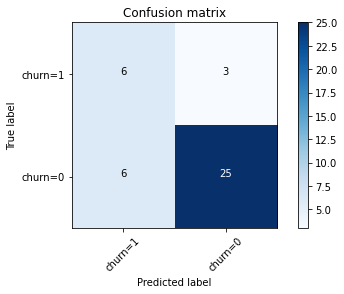

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### Precision, Accuracy, Recall 

In [19]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.50      0.67      0.57         9

    accuracy                           0.78        40
   macro avg       0.70      0.74      0.71        40
weighted avg       0.80      0.78      0.79        40



### Log Loss

In [20]:
# Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5336866103114568

**Part 2**

### Logistic Regression

In [45]:
LR = LogisticRegression(C = 0.1, solver = "saga")
LR.fit(x_train, y_train)
LR

LogisticRegression(C=0.1, solver='saga')

**prediction**

In [46]:
# Now we can predict using our test set
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

**prediction probability**

In [47]:
# predict_proba returns estimates for all classes, ordered by the label of classes
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.65, 0.35],
       [0.58, 0.42],
       [0.54, 0.46],
       [0.94, 0.06],
       [0.85, 0.15],
       [0.89, 0.11],
       [0.96, 0.04],
       [0.61, 0.39],
       [0.93, 0.07],
       [0.49, 0.51],
       [0.75, 0.25],
       [0.95, 0.05],
       [0.74, 0.26],
       [0.97, 0.03],
       [0.89, 0.11],
       [0.56, 0.44],
       [0.59, 0.41],
       [0.99, 0.01],
       [0.68, 0.32],
       [0.75, 0.25],
       [0.92, 0.08],
       [0.77, 0.23],
       [0.92, 0.08],
       [0.55, 0.45],
       [0.92, 0.08],
       [0.37, 0.63],
       [0.91, 0.09],
       [0.58, 0.42],
       [0.42, 0.58],
       [0.52, 0.48],
       [0.56, 0.44],
       [0.48, 0.52],
       [0.72, 0.28],
       [0.73, 0.27],
       [0.47, 0.53],
       [0.91, 0.09],
       [0.77, 0.23],
       [0.73, 0.27],
       [0.64, 0.36],
       [0.58, 0.42]])

### Evaluation

In [48]:
jaccard_score(y_test, yhat)

0.4

In [49]:
### Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 4  5]
 [ 1 30]]


Confusion matrix, without normalization
[[ 4  5]
 [ 1 30]]


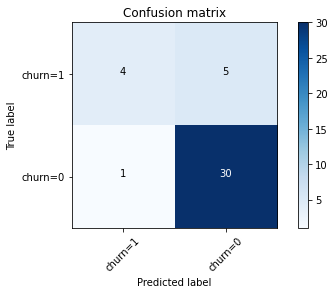

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [51]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.80      0.44      0.57         9

    accuracy                           0.85        40
   macro avg       0.83      0.71      0.74        40
weighted avg       0.84      0.85      0.83        40



### Log Loss

In [52]:
# low performance
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.3995956744855253